<div>
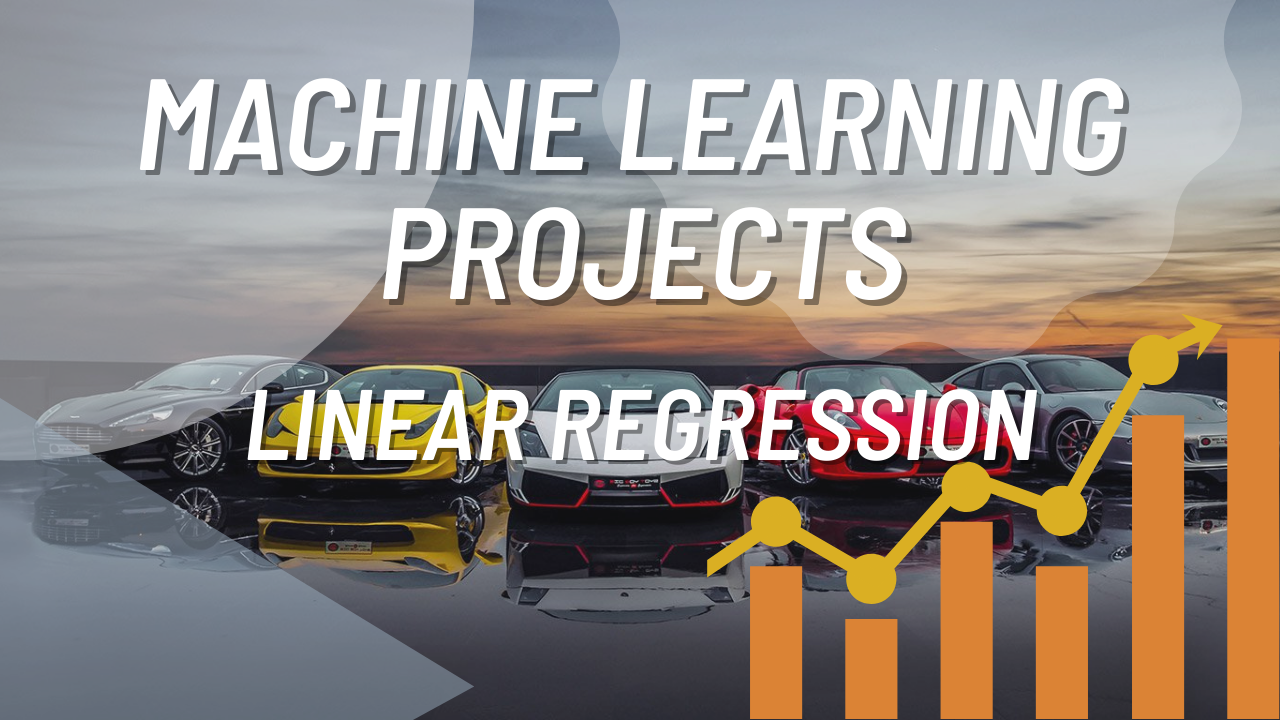
</div>

# Import All necessary library

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

# Read the Dataset

In [2]:
df = pd.read_csv('car data.csv')
df.head()

Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0

# Data Exploration

<AxesSubplot:>

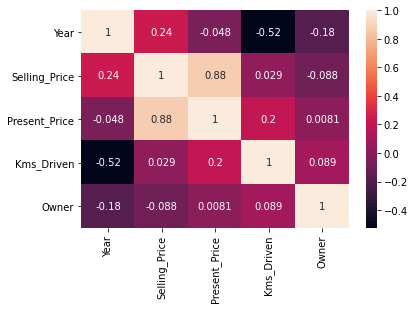

In [3]:
sn.heatmap(df.corr(), annot=True)

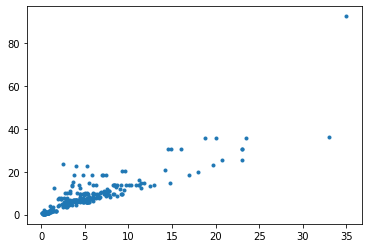

In [4]:
plt.scatter(df['Selling_Price'],df['Present_Price'],marker = '.')

# Selling_Price: This is the price the owner wants to sell the car at.
# Present_Price: This is the current ex-showroom price of the car.

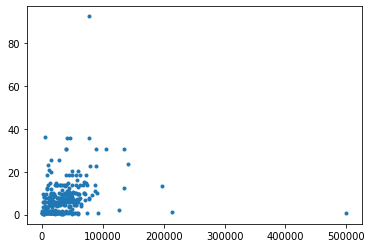

In [5]:
plt.scatter(df['Kms_Driven'],df['Present_Price'],marker = '.')

# Model Functions

In [6]:
x = df['Selling_Price'].to_numpy()
y = df['Present_Price'].to_numpy()
def mean(values):
    return sum(values) / float(len(values))

# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])

# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar

mean_x, mean_y = mean(x), mean(y)
var_x, var_y = variance(x, mean_x), variance(y, mean_y)
covar = covariance(x, mean_x, y, mean_y)

print('x stats: mean=%.3f variance=%.3f' % (mean_x, var_x))
print('y stats: mean=%.3f variance=%.3f' % (mean_y, var_y))
print('Covariance: %.3f' % (covar))


# B1 = sum((x(i) - mean(x)) * (y(i) - mean(y))) / sum( (x(i) - mean(x))^2 )
# B0 = mean(y) - B1 * mean(x)

x stats: mean=4.661 variance=7750.492
y stats: mean=7.628 variance=22416.219
Covariance: 11585.801


# Fit Model

In [7]:
def coefficients(x,y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]

b0,b1 = coefficients(x,y)
print('Coefficients: B0=%.3f, B1=%.3f' % (b0, b1))

Coefficients: B0=0.661, B1=1.495


# Visualiza the Result

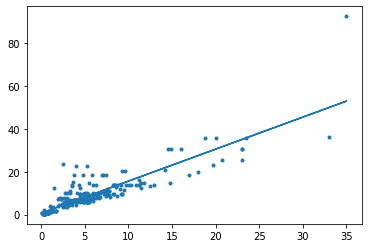

In [8]:
predictions = []
for x_val in x:
    pred =  b0 + b1*x_val
    predictions.append(pred)
plt.scatter(x,y,marker = '.')
plt.plot(x,predictions)

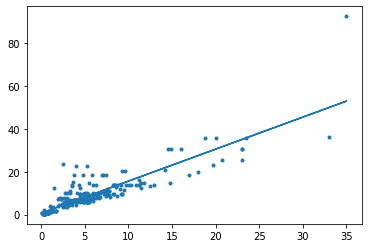

In [9]:
plt.scatter(x,y,marker = '.')
plt.plot(x,predictions)